In [1]:
import rasterio
import numpy as np
from rasterio.merge import merge
from rasterio.plot import show
import matplotlib.pyplot as plt

In [8]:
path = "S2B_MSIL2A_20231020T055849_N0509_R091_T43SBR_20231020T082314.SAFE/GRANULE/L2A_T43SBR_A034580_20231020T060725/QI_DATA/MSK_DETFOO_B"
import os

band_paths = [path+"0"+str(i)+".jp2" for i in range(1,10)]

for i in range(10,13):
    band_paths.append(path+str(i)+".jp2")
# for i in os.listdir(path=path):
#     # for j in os.listdir(path=path + "/" + i):
#     band_paths.append(path + "/" + i)
# 

band_paths


['S2B_MSIL2A_20231020T055849_N0509_R091_T43SBR_20231020T082314.SAFE/GRANULE/L2A_T43SBR_A034580_20231020T060725/QI_DATA/MSK_DETFOO_B01.jp2',
 'S2B_MSIL2A_20231020T055849_N0509_R091_T43SBR_20231020T082314.SAFE/GRANULE/L2A_T43SBR_A034580_20231020T060725/QI_DATA/MSK_DETFOO_B02.jp2',
 'S2B_MSIL2A_20231020T055849_N0509_R091_T43SBR_20231020T082314.SAFE/GRANULE/L2A_T43SBR_A034580_20231020T060725/QI_DATA/MSK_DETFOO_B03.jp2',
 'S2B_MSIL2A_20231020T055849_N0509_R091_T43SBR_20231020T082314.SAFE/GRANULE/L2A_T43SBR_A034580_20231020T060725/QI_DATA/MSK_DETFOO_B04.jp2',
 'S2B_MSIL2A_20231020T055849_N0509_R091_T43SBR_20231020T082314.SAFE/GRANULE/L2A_T43SBR_A034580_20231020T060725/QI_DATA/MSK_DETFOO_B05.jp2',
 'S2B_MSIL2A_20231020T055849_N0509_R091_T43SBR_20231020T082314.SAFE/GRANULE/L2A_T43SBR_A034580_20231020T060725/QI_DATA/MSK_DETFOO_B06.jp2',
 'S2B_MSIL2A_20231020T055849_N0509_R091_T43SBR_20231020T082314.SAFE/GRANULE/L2A_T43SBR_A034580_20231020T060725/QI_DATA/MSK_DETFOO_B07.jp2',
 'S2B_MSIL2A_2023102

In [11]:
path = "./IMG_DATA/R20m"
import os

band_paths = []
for i in os.listdir(path=path):
    # for j in os.listdir(path=path + "/" + i):
    band_paths.append(path + "/" + i)


band_paths.sort()
band_paths = band_paths[1:-3]

band_paths


['./IMG_DATA/R20m/T43SBR_20231020T055849_B01_20m.jp2',
 './IMG_DATA/R20m/T43SBR_20231020T055849_B02_20m.jp2',
 './IMG_DATA/R20m/T43SBR_20231020T055849_B03_20m.jp2',
 './IMG_DATA/R20m/T43SBR_20231020T055849_B04_20m.jp2',
 './IMG_DATA/R20m/T43SBR_20231020T055849_B05_20m.jp2',
 './IMG_DATA/R20m/T43SBR_20231020T055849_B06_20m.jp2',
 './IMG_DATA/R20m/T43SBR_20231020T055849_B07_20m.jp2',
 './IMG_DATA/R20m/T43SBR_20231020T055849_B11_20m.jp2',
 './IMG_DATA/R20m/T43SBR_20231020T055849_B12_20m.jp2',
 './IMG_DATA/R20m/T43SBR_20231020T055849_B8A_20m.jp2']

In [12]:
# band_paths = [
#         "S2B_MSIL2A_20231020T055849_N0509_R091_T43SBR_20231020T082314.SAFE/GRANULE/L2A_T43SBR_A034580_20231020T060725/IMG_DATA/R20m/T43SBR_20231020T055849_B01_20m.jp2",
#     "S2B_MSIL2A_20231020T055849_N0509_R091_T43SBR_20231020T082314.SAFE/GRANULE/L2A_T43SBR_A034580_20231020T060725/IMG_DATA/R20m/T43SBR_20231020T055849_B02_20m.jp2",
#     "S2B_MSIL2A_20231020T055849_N0509_R091_T43SBR_20231020T082314.SAFE/GRANULE/L2A_T43SBR_A034580_20231020T060725/IMG_DATA/R20m/T43SBR_20231020T055849_B03_20m.jp2",
#     "S2B_MSIL2A_20231020T055849_N0509_R091_T43SBR_20231020T082314.SAFE/GRANULE/L2A_T43SBR_A034580_20231020T060725/IMG_DATA/R20m/T43SBR_20231020T055849_B04_20m.jp2",
#     "S2B_MSIL2A_20231020T055849_N0509_R091_T43SBR_20231020T082314.SAFE/GRANULE/L2A_T43SBR_A034580_20231020T060725/IMG_DATA/R20m/T43SBR_20231020T055849_B05_20m.jp2",
#     "S2B_MSIL2A_20231020T055849_N0509_R091_T43SBR_20231020T082314.SAFE/GRANULE/L2A_T43SBR_A034580_20231020T060725/IMG_DATA/R20m/T43SBR_20231020T055849_B06_20m.jp2",
#     "S2B_MSIL2A_20231020T055849_N0509_R091_T43SBR_20231020T082314.SAFE/GRANULE/L2A_T43SBR_A034580_20231020T060725/IMG_DATA/R20m/T43SBR_20231020T055849_B07_20m.jp2",
#     "S2B_MSIL2A_20231020T055849_N0509_R091_T43SBR_20231020T082314.SAFE/GRANULE/L2A_T43SBR_A034580_20231020T060725/IMG_DATA/R20m/T43SBR_20231020T055849_B8A_20m.jp2",
#     "S2B_MSIL2A_20231020T055849_N0509_R091_T43SBR_20231020T082314.SAFE/GRANULE/L2A_T43SBR_A034580_20231020T060725/IMG_DATA/R20m/T43SBR_20231020T055849_B11_20m.jp2",
#     "S2B_MSIL2A_20231020T055849_N0509_R091_T43SBR_20231020T082314.SAFE/GRANULE/L2A_T43SBR_A034580_20231020T060725/IMG_DATA/R20m/T43SBR_20231020T055849_B12_20m.jp2",
# ]
bands = []

for band_path in band_paths:
    with rasterio.open(band_path) as src:
        band = src.read(1)  # Assuming the bands are single-band
        bands.append(band)

bands[0].shape



# concatenated_image = np.stack(bands, axis=0)
# print("Concatenated image shape:", concatenated_image.shape)

(5490, 5490)

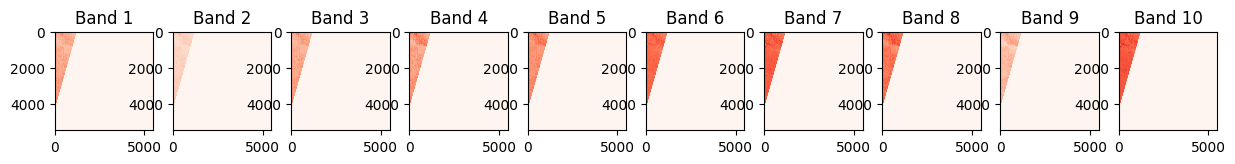

In [15]:
fig, axes = plt.subplots(1, len(bands), figsize=(15, 5))
for i in range(len(bands)):
    axes[i].imshow(bands[i])
    axes[i].set_title(f'Band {i+1}')

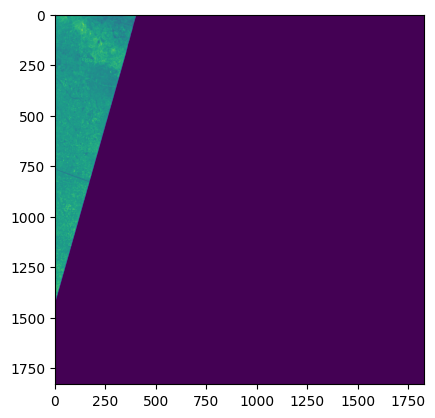

In [22]:


x = np.zeros(bands[0].shape)

for i in bands:
    x += i

plt.imshow(x)

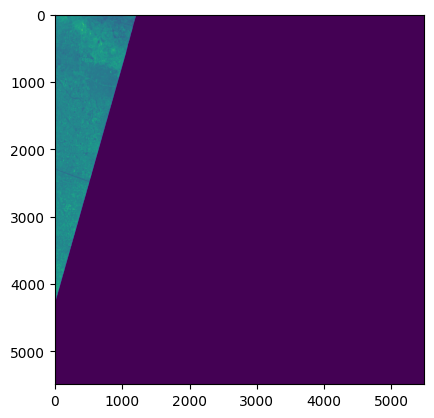

In [16]:
sum = np.sum(concatenated_image, axis=0)
plt.imshow(sum)